In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Kajal's drive location for dataset
path = "drive/MyDrive/project_data/project"

In [ ]:
# Loading Data
X_test = np.load(path + "/X_test.npy")
y_test = np.load(path + "/y_test.npy")
person_train_valid = np.load(path + "/person_train_valid.npy")
X_train_valid = np.load(path + "/X_train_valid.npy")
y_train_valid = np.load(path+ "/y_train_valid.npy")
person_test = np.load(path + "/person_test.npy")


### Shape of data

In [ ]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


# Building Train and Validation sets

In [ ]:
# Generating the training and validation indices using random splitting
ind_valid = np.random.choice(X_train_valid.shape[0], math.floor(0.15*X_train_valid.shape[0]), replace=False)
ind_train = np.array(list(set(range(X_train_valid.shape[0])).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(X_train, X_valid) = X_train_valid[ind_train], X_train_valid[ind_valid]
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
(p_train, p_valid) = person_train_valid[ind_train], person_train_valid[ind_valid]

In [ ]:
print("Train Data Shape: ")
print("Input Shape:", X_train.shape)
print("Labels Shape:", y_train.shape)
print("Persons Shape:", p_train.shape)

print()

print("Validation Data Shape: ")
print("Input Shape:", X_valid.shape)
print("Labels Shape:", y_valid.shape)
print("Persons Shape:", p_valid.shape)

Train Data Shape: 
Input Shape: (1798, 22, 1000)
Labels Shape: (1798,)
Persons Shape: (1798, 1)

Validation Data Shape: 
Input Shape: (317, 22, 1000)
Labels Shape: (317,)
Persons Shape: (317, 1)


In [ ]:
# for naming consistency
p_test = person_test

Note:

Train Data: X_train, y_train, p_train

Validation Data: X_test, y_test, p_test

Test Data: X_valid, y_valid, p_valid

**Basic Understanding**

Training data consists of 2115 datapoints.
Test data consists of 443 datapoints.

Each datapoint is a trial:

*   Input -> Has dimension 22*1000 representing EEG data from 22 electrodes over 1000 time bins.
*   Output -> A category (4 categories total) that represents the action the user was thinking about during this trial. Currently the possible outputs/labels are (769, 770, 771, 772).

The person files correspond to the subject performing the task, ranging from 0-8 (inclusive).

Trials that have NaNs are already removed.

### Data Processing

Adjust Labels

In [ ]:
# # Adjusting the labels so that:
# # Cue onset left - 0
# # Cue onset right - 1
# # Cue onset foot - 2
# # Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

In [ ]:
# Helper function for visualizing the data for a channel
def plot_channel_data(channel):
  if(channel >= 22 or channel < 0):
    return

  print("Channel: ", channel)
  ch_data = X_train_valid[:,channel,:]

  class_0_ind = np.where(y_train_valid == 0)
  ch_data_class_0 = ch_data[class_0_ind]
  avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)
  print(avg_ch_data_class_0.shape)


  class_1_ind = np.where(y_train_valid == 1)
  ch_data_class_1 = ch_data[class_1_ind]
  avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)
  print(avg_ch_data_class_1.shape)

  class_2_ind = np.where(y_train_valid == 2)
  ch_data_class_2 = ch_data[class_2_ind]
  avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)
  print(avg_ch_data_class_2.shape)

  class_3_ind = np.where(y_train_valid == 3)
  ch_data_class_3 = ch_data[class_3_ind]
  avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)
  print(avg_ch_data_class_3.shape)


  plt.plot(np.arange(1000),avg_ch_data_class_0)
  plt.plot(np.arange(1000),avg_ch_data_class_1)
  plt.plot(np.arange(1000),avg_ch_data_class_2)
  plt.plot(np.arange(1000),avg_ch_data_class_3)
  plt.axvline(x=500, label='line at t=500',c='cyan')

  plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])

Channel:  0
(1000,)
(1000,)
(1000,)
(1000,)


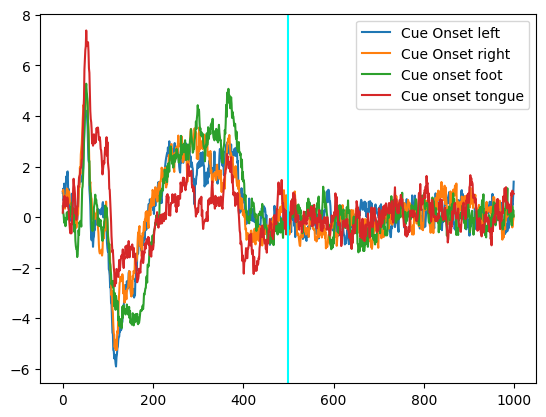

In [ ]:
plot_channel_data(0)

Channel:  10
(1000,)
(1000,)
(1000,)
(1000,)


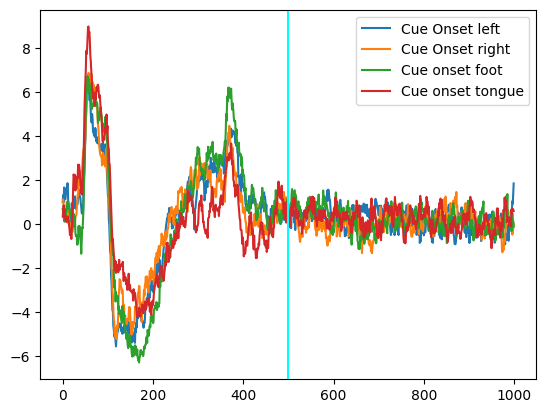

In [ ]:
plot_channel_data(10)

Channel:  20
(1000,)
(1000,)
(1000,)
(1000,)


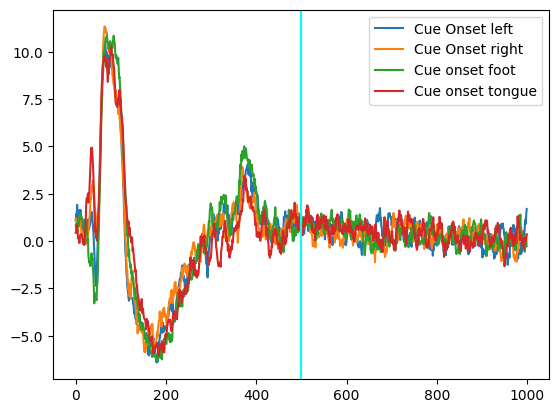

In [ ]:
plot_channel_data(20)

# **Different visualization methods**

Here, we are exploring different visualization methods of the dataset to get more insights into the data.

1. First, we generated the heatmap for first trial.
2. Then, we switched to plot the data distribution of each point. Here, we plotted for first, 10th and 20th data points.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, cmap='coolwarm', xticklabels=50, yticklabels=5)
    plt.title('EEG Data Heatmap')
    plt.xlabel('Time Bins')
    plt.ylabel('Electrodes')
    plt.show()


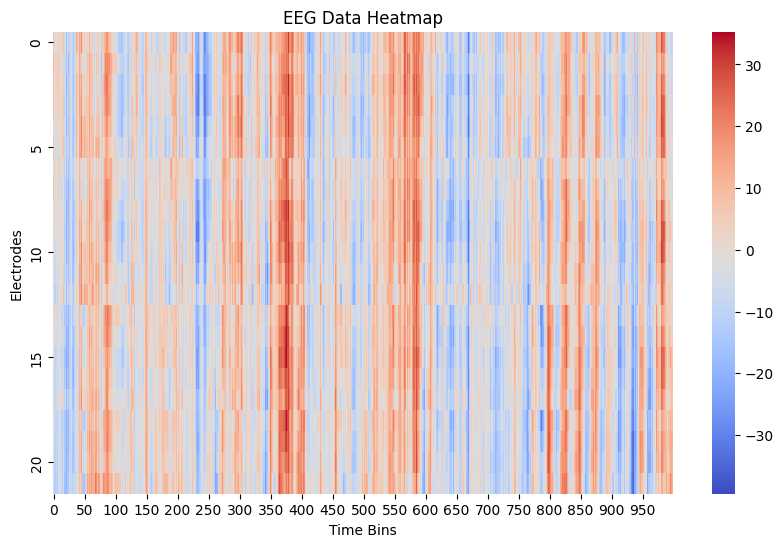

In [ ]:
 # Plotting heatmap for the first trial
plot_heatmap(X_train_valid[0])

In [ ]:
def plot_data_distribution(channel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_train_valid[:, channel, :])
    plt.title('EEG Data Distribution for Channel {}'.format(channel))
    plt.xlabel('Time Bins')
    plt.ylabel('EEG Data')
    plt.show()

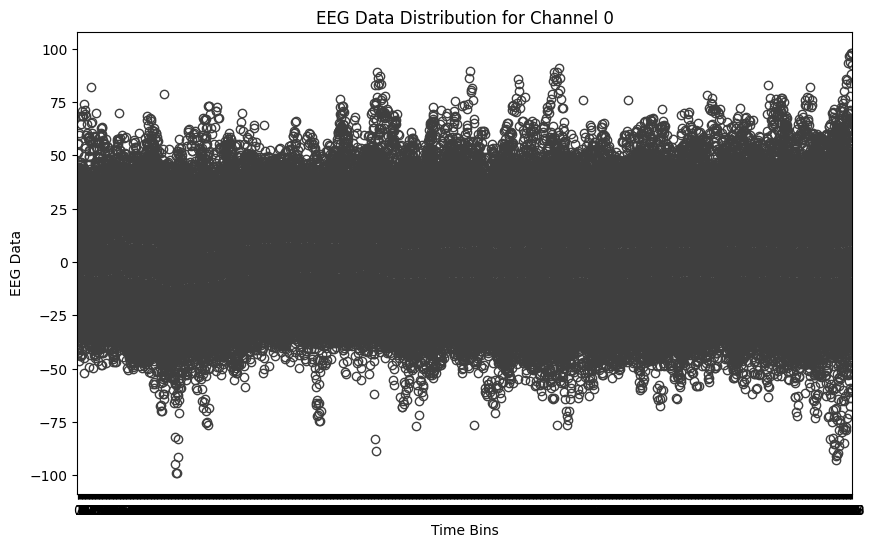

In [ ]:
# Plotting distribution for the first channel
plot_data_distribution(0)

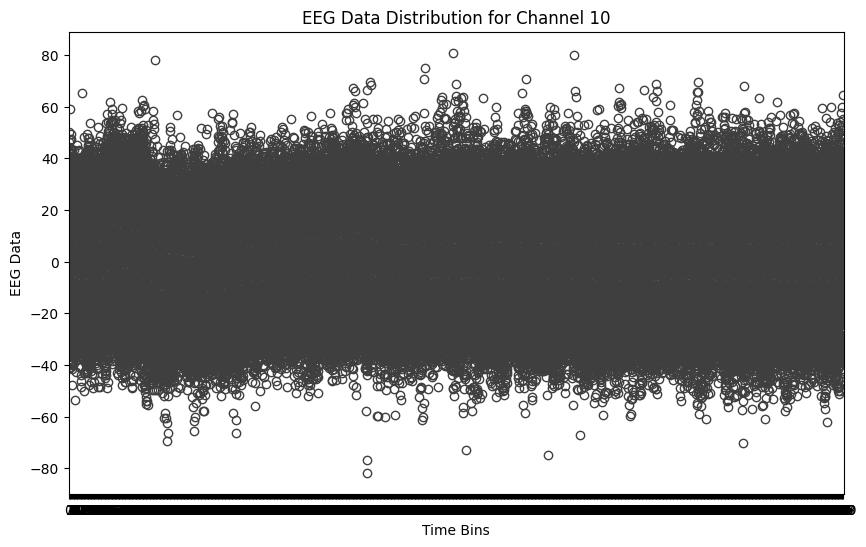

In [ ]:
# Plotting distribution for the 10th channel
plot_data_distribution(10)

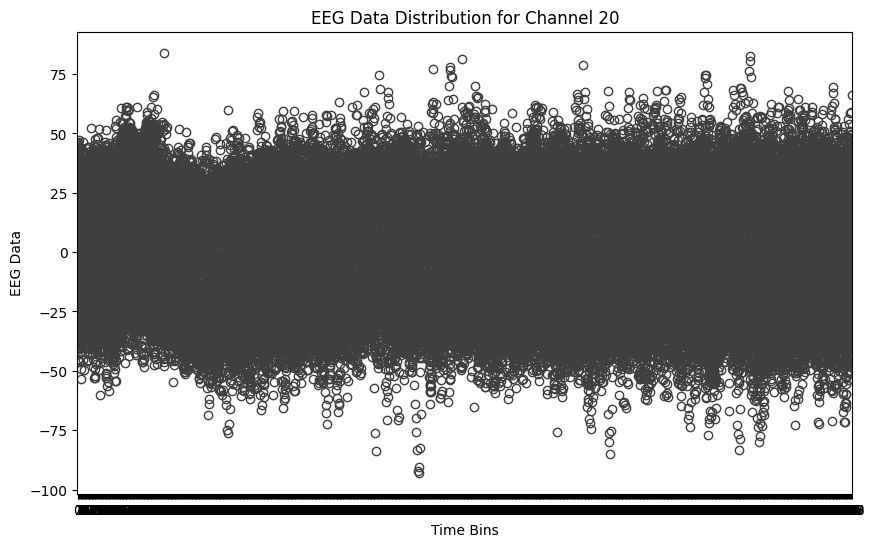

In [ ]:
# Plotting distribution for the 20th channel
plot_data_distribution(20)

# **Computing the spectrogram of EEG Data**

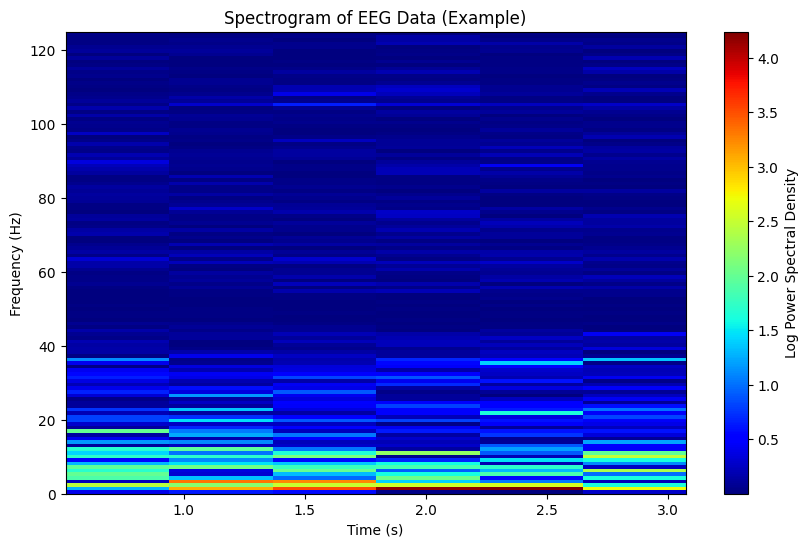

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Define parameters for spectrogram computation
nperseg = 256  # Length of each segment for computing the FFT
noverlap = 128  # Number of points to overlap between segments
fs = 250  # Sampling frequency of the EEG data

# Compute spectrograms for each sample in the training data
spectrograms = []
for sample in X_train:
    sample_spectrograms = []
    for channel_data in sample:
        # Compute spectrogram for each channel in the sample
        f, t, Sxx = spectrogram(channel_data, fs=fs, nperseg=nperseg, noverlap=noverlap)
        sample_spectrograms.append(Sxx)
    spectrograms.append(sample_spectrograms)

# Convert to numpy array
spectrograms = np.array(spectrograms)

# Plot an example spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(np.log(spectrograms[0][0] + 1), aspect='auto', cmap='jet', origin='lower',
           extent=[t.min(), t.max(), f.min(), f.max()])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of EEG Data (Example)')
plt.colorbar(label='Log Power Spectral Density')
plt.show()